In Germany seperation of power divides the political power into three branches of government, namely legislature, executive and judiciary.
Therefore the reinging party of a state should theoretically as part of the executive have no influence on judiciary. 

I want to test this and see if there is some correlation between reiging partys and the amount of telecommunication surveillance.

In [32]:
import pandas as pd
import numpy as np

import sys
sys.path.insert(0, '..')
from src.dataProcessing import yearlySum

In [33]:
xls = pd.ExcelFile('../dat/surveillance_data.xlsx')
data = yearlySum(xls)
data


,BW,BY,BE,BB,HB,HH,HE,MV,NI,NW,RP,SL,SN,ST,SH,TH
Year,,,,,,,,,,,,,,,,
2013-01-01,2353,3501,2053,289,330,1175,5313,719,1701,2847,608,115,1166,523,107,338
2016-01-01,2076,4271,1845,288,329,1332,5835,324,2262,1927,638,285,1122,473,315,203
2019-01-01,2214,4186,1624,181,226,872,5680,365,1813,1132,548,99,654,415,258,285
2020-01-01,1988,3770,1364,268,150,949,5230,355,1335,1287,446,99,690,365,986,272
2021-01-01,1854,3905,1302,207,129,770,5311,283,1603,1086,526,87,535,397,910,242


Unfortuntly I was not able to find a ready to use dataset on the past governments of germanys states. Therefore I decide to manually take the data from WikiPedia.

https://www.statistik-bw.de/Service/Veroeff/Monatshefte/PDF/Beitrag22_03_09.
https://de.wikipedia.org/wiki/Ergebnisse_der_Landtagswahlen_in_der_Bundesrepublik_Deutschland

In [34]:
import glob
import os
# Get a list of all CSV files
csv_files = glob.glob('../dat/election_results_per_state/*.csv')

# Initialize an empty list to store the dataframes
dfs = []
# Loop through the list of CSV files
for filename in csv_files:
    # Read the CSV file
    government = pd.read_csv(filename, header=0)
    
    # Derive the state name from the filename
    state = os.path.basename(filename).replace('.csv', '')

    # Insert the new column at the third position (index=2)
    government.insert(2, 'State', state)
    
    # Append the dataframe to the list of dataframes
    dfs.append(government)

# Concatenate all dataframes in the list into a single dataframe
government = pd.concat(dfs, ignore_index=True)

government.head(10)


,Wahltag,Wbt.,State,Grüne,CDU,SPD,FDP/DVP,AfD,NPD,REP,...,FDP,DVU,DZP,Piraten,BiW,SSW,FDP/DPS,FW,CSU,BP
0,27.03.2011,66.3,bw,24.2,39.0,23.1,5.3,0.0,1.0,1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13.03.2016,70.4,bw,30.3,27.0,12.7,8.3,15.1,0.4,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14.03.2021,63.8,bw,32.6,24.1,11.0,10.5,9.7,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27.09.2009,67.5,bb,5.6,19.8,33.0,NaN,0.0,NaN,NaN,...,7.2,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14.09.2014,47.9,bb,6.2,23.0,31.9,NaN,12.2,NaN,NaN,...,1.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01.09.2019,61.3,bb,10.8,15.6,26.2,NaN,23.5,NaN,NaN,...,4.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,13.05.2012,59.6,nw,11.3,26.3,39.1,NaN,0.0,NaN,NaN,...,8.6,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,14.05.2017,65.2,nw,6.4,33.0,31.2,NaN,7.4,NaN,NaN,...,12.6,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,15.05.2022,55.5,nw,18.2,35.7,26.7,NaN,5.4,NaN,NaN,...,5.9,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,30.08.2009,56.2,th,6.2,31.2,18.5,NaN,0.0,NaN,NaN,...,7.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
len(government['State'].unique()) == 16


True

In [36]:
government.fillna(0, inplace=True)
# Create a new column 'total' that contains the sum of all values in each row
government['total'] = government.iloc[:, 3:].sum(axis=1, numeric_only=True)

# Create a new column 'check' that checks if 'total' is equal to 1
government['check'] = government['total'] == 100
government

,Wahltag,Wbt.,State,Grüne,CDU,SPD,FDP/DVP,AfD,NPD,REP,...,DZP,Piraten,BiW,SSW,FDP/DPS,FW,CSU,BP,total,check
0,27.03.2011,66.3,bw,24.2,39.0,23.1,5.3,0.0,1.0,1.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,True
1,13.03.2016,70.4,bw,30.3,27.0,12.7,8.3,15.1,0.4,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,True
2,14.03.2021,63.8,bw,32.6,24.1,11.0,10.5,9.7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,True
3,27.09.2009,67.5,bb,5.6,19.8,33.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.12,False
4,14.09.2014,47.9,bb,6.2,23.0,31.9,0.0,12.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.70,False
5,01.09.2019,61.3,bb,10.8,15.6,26.2,0.0,23.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.00,False
6,13.05.2012,59.6,nw,11.3,26.3,39.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,True
7,14.05.2017,65.2,nw,6.4,33.0,31.2,0.0,7.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,True
8,15.05.2022,55.5,nw,18.2,35.7,26.7,0.0,5.4,0.0,0.0,...,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.10,False
9,30.08.2009,56.2,th,6.2,31.2,18.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,True


There are some data obviously wrong, however I consider these as minor deviations an I am generally happy wiht the data.

We can see that we have lots of parties in Germany. However we are more interested in the general pattern and some of these parties are very small opposition partys, which I would bundle into the "Übrige" Category. I make the following assumptions:
- if a party fails to at least jump over 10% of votes, I will drop it and add its percentage to "Übrige"
- FDP had partnerships with other parties however we will put them together anyways
- CDU and CSU are considered as one party

In [37]:
# Define the threshold
threshold = 10

# Loop over the columns (parties)
for column in government.columns:
    # Check if the party received less than the threshold
    if column not in ['Wahltag', 'Wbt.', 'State', 'Reg1','Reg2', 'Reg3'] and government[column].max() < threshold:
        # Add the votes to the 'Übrige' column
        government['Übrige'] += government[column]
        # Drop the column
        government = government.drop(column, axis=1)

# If there are any partnerships with FDP, add them to the FDP column
partnerships = ['FDP/DVP', 'FDP/DPS']  # replace with actual column names
for partner in partnerships:
    if partner in government.columns:
        government['FDP'] += government[partner]
        government = government.drop(partner, axis=1)

#also add CSU and CDU
government['CDU'] += government['CSU']
government = government.drop('CSU', axis=1)
government.replace('CSU', 'CDU', inplace=True)
government.head(10)

,Wahltag,Wbt.,State,Grüne,CDU,SPD,AfD,Übrige,Reg1,Reg2,Reg3,Linke,FDP,FW,total
0,27.03.2011,66.3,bw,24.2,39.0,23.1,0.0,9.40,Grüne,SPD,0,0.0,5.3,0.0,100.00
1,13.03.2016,70.4,bw,30.3,27.0,12.7,15.1,7.60,Grüne,CDU,0,0.0,8.3,0.0,100.00
2,14.03.2021,63.8,bw,32.6,24.1,11.0,9.7,13.10,Grüne,CDU,0,0.0,10.5,0.0,100.00
3,27.09.2009,67.5,bb,5.6,19.8,33.0,0.0,7.32,SPD,Linke,0,27.2,7.2,0.0,100.12
4,14.09.2014,47.9,bb,6.2,23.0,31.9,12.2,9.30,SPD,Linke,0,18.6,1.5,0.0,102.70
5,01.09.2019,61.3,bb,10.8,15.6,26.2,23.5,10.10,SPD,Grüne,CDU,10.7,4.1,0.0,101.00
6,13.05.2012,59.6,nw,11.3,26.3,39.1,0.0,13.20,SPD,Grüne,0,2.5,8.6,0.0,100.00
7,14.05.2017,65.2,nw,6.4,33.0,31.2,7.4,5.50,CDU,FDP,0,4.9,12.6,0.0,100.00
8,15.05.2022,55.5,nw,18.2,35.7,26.7,5.4,6.10,CDU,Grüne,0,2.1,5.9,0.0,100.10
9,30.08.2009,56.2,th,6.2,31.2,18.5,0.0,10.10,CDU,SPD,0,27.4,7.6,0.0,100.00


From Experiment 2 we know that the States Bavaria & Hessen are the ones where surveillence laws get applied most frequently. Also they behave very similiary over time.

In [38]:
by_and_hs = government[government['State'].isin(['by', 'he'])]
by_and_hs

,Wahltag,Wbt.,State,Grüne,CDU,SPD,AfD,Übrige,Reg1,Reg2,Reg3,Linke,FDP,FW,total
31,18.01.2009,61.0,he,13.7,37.2,23.7,0.0,3.8,CDU,FDP,0,5.4,16.2,0.0,100.0
32,22.09.2013,73.2,he,11.1,38.3,30.7,4.1,9.7,CDU,Grüne,0,5.2,5.0,0.0,104.1
33,28.10.2018,67.3,he,19.8,27.0,19.8,13.1,6.5,CDU,Grüne,0,6.3,7.5,0.0,100.0
34,8.10.2023,66.0,he,14.8,34.6,15.1,18.4,10.0,CDU,Grüne,0,3.1,5.0,0.0,100.0
51,28.09.2008,58.1,by,9.4,43.4,18.6,0.0,11.4,CDU,FDP,0,0.0,8.0,10.2,100.0
52,15.09.2013,63.9,by,8.6,47.7,20.6,0.0,11.8,CDU,0,0,0.0,3.3,9.0,100.0
53,14.10.2018,72.4,by,17.6,37.2,9.7,10.2,8.7,CDU,FW,0,0.0,5.1,11.6,100.1
54,8.10.2023,73.3,by,14.4,37.0,8.4,14.6,7.8,CDU,FW,0,0.0,3.0,15.8,100.0


In both countrys the CDU is in governemnt...

Lets build a new dataframe, where we put together our data from telecomunication surveillance and the governement!

In [39]:
#The yearly sum of applied telecommunication surveillance per year and state
data.index = data.index.year
data


,BW,BY,BE,BB,HB,HH,HE,MV,NI,NW,RP,SL,SN,ST,SH,TH
Year,,,,,,,,,,,,,,,,
2013,2353,3501,2053,289,330,1175,5313,719,1701,2847,608,115,1166,523,107,338
2016,2076,4271,1845,288,329,1332,5835,324,2262,1927,638,285,1122,473,315,203
2019,2214,4186,1624,181,226,872,5680,365,1813,1132,548,99,654,415,258,285
2020,1988,3770,1364,268,150,949,5230,355,1335,1287,446,99,690,365,986,272
2021,1854,3905,1302,207,129,770,5311,283,1603,1086,526,87,535,397,910,242


In [40]:
#Adding empty columns for the government parties
#for state in data.columns[1:]:
#    data = data.assign(**{f'{state}_Reg1': np.nan, f'{state}_Reg2': np.nan, f'{state}_Reg3': np.nan})
    
#sorting the columns alphabetically
#data = data.sort_index(axis=1)
#data

In [41]:
#we only want to analyze the most important parties for now
government = government[['Wahltag', 'State', 'Reg1', 'Reg2', 'Reg3','CDU', 'SPD', 'Grüne', 'Linke', 'AfD']]
government.loc[:, 'Wahltag'] = pd.to_datetime(government['Wahltag'], format='%d.%m.%Y').dt.year

government.set_index('Wahltag', inplace=True)
government.sort_index(inplace=True)
government.head(10)

,State,Reg1,Reg2,Reg3,CDU,SPD,Grüne,Linke,AfD
Wahltag,,,,,,,,,
2008,ni,CDU,FDP,0,42.5,30.3,8.0,7.1,0.0
2008,by,CDU,FDP,0,43.4,18.6,9.4,0.0,0.0
2009,sn,CDU,FDP,0,40.2,10.4,6.4,20.6,0.0
2009,sl,CDU,FDP,Grüne,34.5,24.5,5.9,21.3,0.0
2009,bb,SPD,Linke,0,19.8,33.0,5.6,27.2,0.0
2009,he,CDU,FDP,0,37.2,23.7,13.7,5.4,0.0
2009,sh,CDU,FDP,0,31.5,25.4,12.4,6.0,0.0
2009,th,CDU,SPD,0,31.2,18.5,6.2,27.4,0.0
2011,mv,SPD,CDU,0,23.0,35.6,8.7,18.4,0.0


In [42]:
#For now the State was stored in a single column, we want to have in the column name directily
#This is needed to later merge the dateframes, at least I didn't find another way to do it
#Also each year now has a single row instad of multiple rows for each state!

unique_years = pd.DataFrame(government.index.unique(), columns=['Wahltag'])

# For each unique state
for state in government['State'].unique():
    # Filter government for this state
    state_df = government[government['State'] == state].copy()
    # Drop the 'State' column
    state_df.drop(columns='State', inplace=True)
    # Rename the other columns to include the state value
    state = state.upper()
    state_df.columns = [f'{state}_{col}' for col in state_df.columns]
    # Merge with unique_years on 'Wahltag'
    unique_years = pd.merge(unique_years, state_df, on='Wahltag', how='left')

unique_years.set_index('Wahltag', inplace=True)
unique_years.sort_index(axis=0, inplace=True)
unique_years.sort_index(axis=1, inplace=True)
unique_years.head(5)

,BB_AfD,BB_CDU,BB_Grüne,BB_Linke,BB_Reg1,BB_Reg2,BB_Reg3,BB_SPD,BE_AfD,BE_CDU,...,ST_Reg3,ST_SPD,TH_AfD,TH_CDU,TH_Grüne,TH_Linke,TH_Reg1,TH_Reg2,TH_Reg3,TH_SPD
Wahltag,,,,,,,,,,,,,,,,,,,,,
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,0.0,19.8,5.6,27.2,SPD,Linke,0,33.0,NaN,NaN,...,NaN,NaN,0.0,31.2,6.2,27.4,CDU,SPD,0,18.5
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,23.3,...,0,21.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here comes another important step. For each year, where we do have NaN entry, which means that there was no election in that state in that year, we copy the result from the last election/government, as government only changes after election.

In [43]:
#Filling the NaN values with the last valid value
unique_years = unique_years.fillna(method='ffill')
unique_years

/var/folders/81/7cc4l6x15vn92s_3hb78hbr40000gn/T/ipykernel_31621/4245598225.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  unique_years = unique_years.fillna(method='ffill')


,BB_AfD,BB_CDU,BB_Grüne,BB_Linke,BB_Reg1,BB_Reg2,BB_Reg3,BB_SPD,BE_AfD,BE_CDU,...,ST_Reg3,ST_SPD,TH_AfD,TH_CDU,TH_Grüne,TH_Linke,TH_Reg1,TH_Reg2,TH_Reg3,TH_SPD
Wahltag,,,,,,,,,,,,,,,,,,,,,
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,0.0,19.8,5.6,27.2,SPD,Linke,0,33.0,NaN,NaN,...,NaN,NaN,0.0,31.2,6.2,27.4,CDU,SPD,0,18.5
2011,0.0,19.8,5.6,27.2,SPD,Linke,0,33.0,0.0,23.3,...,0,21.5,0.0,31.2,6.2,27.4,CDU,SPD,0,18.5
2012,0.0,19.8,5.6,27.2,SPD,Linke,0,33.0,0.0,23.3,...,0,21.5,0.0,31.2,6.2,27.4,CDU,SPD,0,18.5
2013,0.0,19.8,5.6,27.2,SPD,Linke,0,33.0,0.0,23.3,...,0,21.5,0.0,31.2,6.2,27.4,CDU,SPD,0,18.5
2014,12.2,23.0,6.2,18.6,SPD,Linke,0,31.9,0.0,23.3,...,0,21.5,10.6,33.5,5.7,28.2,Linke,SPD,Grüne,12.4
2015,12.2,23.0,6.2,18.6,SPD,Linke,0,31.9,0.0,23.3,...,0,21.5,10.6,33.5,5.7,28.2,Linke,SPD,Grüne,12.4
2016,12.2,23.0,6.2,18.6,SPD,Linke,0,31.9,14.2,17.6,...,Grüne,10.6,10.6,33.5,5.7,28.2,Linke,SPD,Grüne,12.4
2017,12.2,23.0,6.2,18.6,SPD,Linke,0,31.9,14.2,17.6,...,Grüne,10.6,10.6,33.5,5.7,28.2,Linke,SPD,Grüne,12.4


In [44]:
#Telecommunication surveillance data is only available for the years 2013, 2016, 2019, 2020 and 2021
selected_years = unique_years.loc[[2013, 2016, 2019, 2020, 2021]]
selected_years

,BB_AfD,BB_CDU,BB_Grüne,BB_Linke,BB_Reg1,BB_Reg2,BB_Reg3,BB_SPD,BE_AfD,BE_CDU,...,ST_Reg3,ST_SPD,TH_AfD,TH_CDU,TH_Grüne,TH_Linke,TH_Reg1,TH_Reg2,TH_Reg3,TH_SPD
Wahltag,,,,,,,,,,,,,,,,,,,,,
2013,0.0,19.8,5.6,27.2,SPD,Linke,0,33.0,0.0,23.3,...,0,21.5,0.0,31.2,6.2,27.4,CDU,SPD,0,18.5
2016,12.2,23.0,6.2,18.6,SPD,Linke,0,31.9,14.2,17.6,...,Grüne,10.6,10.6,33.5,5.7,28.2,Linke,SPD,Grüne,12.4
2019,23.5,15.6,10.8,10.7,SPD,Grüne,CDU,26.2,14.2,17.6,...,Grüne,10.6,23.4,21.7,5.2,31.0,Linke,SPD,Grüne,8.2
2020,23.5,15.6,10.8,10.7,SPD,Grüne,CDU,26.2,14.2,17.6,...,Grüne,10.6,23.4,21.7,5.2,31.0,Linke,SPD,Grüne,8.2
2021,23.5,15.6,10.8,10.7,SPD,Grüne,CDU,26.2,8.0,18.0,...,Grüne,8.4,23.4,21.7,5.2,31.0,Linke,SPD,Grüne,8.2


In [45]:
#Finally we can put the data together

# Concatenate `selected_years` with `data` along the columns axis
data = pd.concat([data, selected_years], axis=1)

# Replace 'CSU' with 'CDU'
data = data.replace('CSU', 'CDU')

# Sort the columns
data.sort_index(axis=1, inplace=True)

data

,BB,BB_AfD,BB_CDU,BB_Grüne,BB_Linke,BB_Reg1,BB_Reg2,BB_Reg3,BB_SPD,BE,...,ST_SPD,TH,TH_AfD,TH_CDU,TH_Grüne,TH_Linke,TH_Reg1,TH_Reg2,TH_Reg3,TH_SPD
2013,289,0.0,19.8,5.6,27.2,SPD,Linke,0,33.0,2053,...,21.5,338,0.0,31.2,6.2,27.4,CDU,SPD,0,18.5
2016,288,12.2,23.0,6.2,18.6,SPD,Linke,0,31.9,1845,...,10.6,203,10.6,33.5,5.7,28.2,Linke,SPD,Grüne,12.4
2019,181,23.5,15.6,10.8,10.7,SPD,Grüne,CDU,26.2,1624,...,10.6,285,23.4,21.7,5.2,31.0,Linke,SPD,Grüne,8.2
2020,268,23.5,15.6,10.8,10.7,SPD,Grüne,CDU,26.2,1364,...,10.6,272,23.4,21.7,5.2,31.0,Linke,SPD,Grüne,8.2
2021,207,23.5,15.6,10.8,10.7,SPD,Grüne,CDU,26.2,1302,...,8.4,242,23.4,21.7,5.2,31.0,Linke,SPD,Grüne,8.2


Finallay a dataproduct !!
My Idea now is to look at each state, and check how many laws have been applied while keeping track of the government in that state.

In [46]:
# data for one state is always stored in 9 columns
#-> we need to group the columns by 9
law_with_CDU  = 0
law_without_CDU = 0

law_with_SPD = 0    
law_without_SPD = 0

law_with_Linke = 0
law_without_Linke = 0

law_with_Gruene = 0
law_without_Gruene = 0

nr_of_gov_cdu = 0
nr_of_gov_spd = 0
nr_of_gov_linke = 0
nr_of_gov_gruene = 0



weight_afd = 0
weight_cdu = 0
weight_spd = 0
weight_linke = 0
weight_gruene = 0


for i in range(0, len(data.columns)-1, 9):
    window = data.iloc[:, i:i+9]
    # Do something with the window
    state = window.columns[0]
    for year in window.index:
        if (window.loc[year, [f'{state}_Reg1', f'{state}_Reg2', f'{state}_Reg3']] == 'CDU').any():
            law_with_CDU += window.loc[year, state]
            nr_of_gov_cdu += 1
        else:
            law_without_CDU += window.loc[year, state]

        if (window.loc[year, [f'{state}_Reg1', f'{state}_Reg2', f'{state}_Reg3']] == 'SPD').any():
            law_with_SPD += window.loc[year, state]
            nr_of_gov_spd += 1
        else:
            law_without_SPD += window.loc[year, state]

        if (window.loc[year, [f'{state}_Reg1', f'{state}_Reg2', f'{state}_Reg3']] == 'Linke').any():
            law_with_Linke += window.loc[year, state]
            nr_of_gov_linke += 1
        else:
            law_without_Linke += window.loc[year, state]
        
        if (window.loc[year, [f'{state}_Reg1', f'{state}_Reg2', f'{state}_Reg3']] == 'Grüne').any():
            law_with_Gruene += window.loc[year, state]
            nr_of_gov_gruene += 1
        else:   
            law_without_Gruene += window.loc[year, state]
        
        weight_afd += window.loc[year, f'{state}_AfD'] *0.01* window.loc[year, state]
        weight_cdu += window.loc[year, f'{state}_CDU'] *0.01* window.loc[year, state]
        weight_spd += window.loc[year, f'{state}_SPD'] *0.01* window.loc[year, state]
        weight_linke += window.loc[year, f'{state}_Linke'] *0.01* window.loc[year, state]
        weight_gruene += window.loc[year, f'{state}_Grüne'] *0.01* window.loc[year, state]


print('law_with_CDU: ', law_with_CDU)
print('law_without_CDU: ', law_without_CDU)
print('law_with_SPD: ', law_with_SPD)
print('law_without_SPD: ', law_without_SPD)
print('law_with_Linke: ', law_with_Linke)
print('law_without_Linke: ', law_without_Linke)
print('law_with_Gruene: ', law_with_Gruene)
print('law_without_Gruene: ', law_without_Gruene)

print('weight_afd: ', weight_afd)
print('weight_cdu: ', weight_cdu)
print('weight_spd: ', weight_spd)
print('weight_linke: ', weight_linke)
print('weight_gruene: ', weight_gruene)

print('nr_of_gov_cdu: ', nr_of_gov_cdu)
print('nr_of_gov_spd: ', nr_of_gov_spd)
print('nr_of_gov_linke: ', nr_of_gov_linke)
print('nr_of_gov_gruene: ', nr_of_gov_gruene)


law_with_CDU:  75326
law_without_CDU:  30590
law_with_SPD:  31661
law_without_SPD:  74255
law_with_Linke:  1862
law_without_Linke:  104054
law_with_Gruene:  57120
law_without_Gruene:  48796
weight_afd:  8607.339
weight_cdu:  33036.16000000001
weight_spd:  25248.020999999997
weight_linke:  6047.481000000002
weight_gruene:  15703.095999999998
nr_of_gov_cdu:  46
nr_of_gov_spd:  47
nr_of_gov_linke:  7
nr_of_gov_gruene:  38


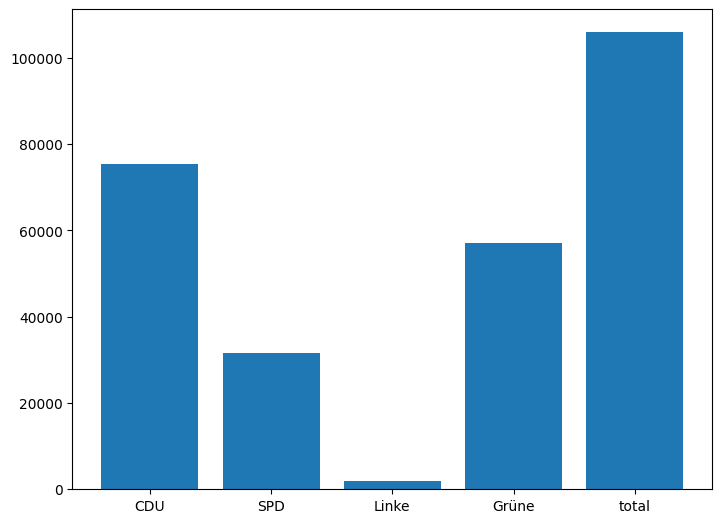

In [47]:
#plot the above results as bar plot
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
parties = ['CDU', 'SPD', 'Linke', 'Grüne', 'total']
laws = [law_with_CDU, law_with_SPD, law_with_Linke, law_with_Gruene, law_with_CDU+law_without_CDU]
ax.bar(parties,laws)
plt.show()


This plot shows: If a law has been applied in one of the 5 available years, 

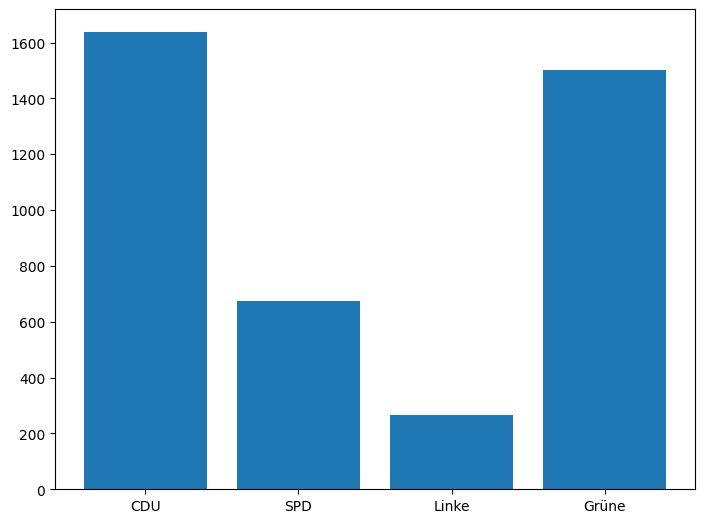

In [48]:
#plot the above results as bar plot
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
parties = ['CDU', 'SPD', 'Linke', 'Grüne']
laws = [law_with_CDU/nr_of_gov_cdu, law_with_SPD/nr_of_gov_spd, law_with_Linke/nr_of_gov_linke, 
        law_with_Gruene/nr_of_gov_gruene]
ax.bar(parties,laws)
plt.show()

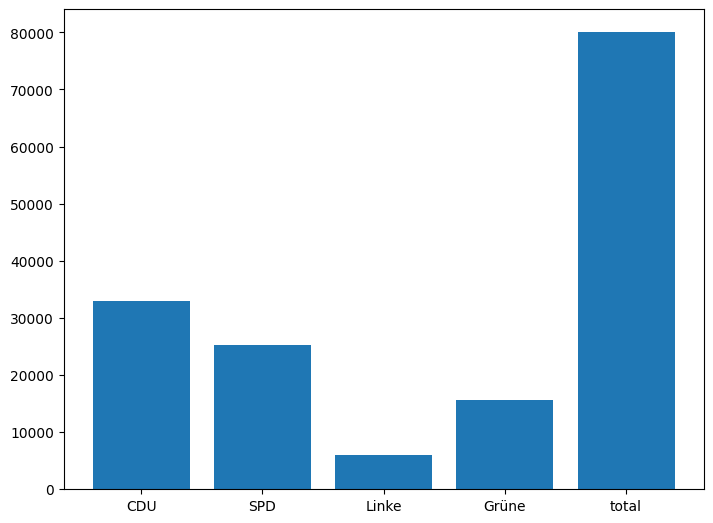

In [49]:
#plot the above results as bar plot
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
parties = ['CDU', 'SPD', 'Linke', 'Grüne', 'total']
weights = [weight_cdu, weight_spd, weight_linke, weight_gruene, weight_cdu+weight_spd+weight_linke+weight_gruene]
ax.bar(parties,weights)
plt.show()

Conditional Probabilities? is the prob increased, if eg. CDU is in the executive?
Can we use the election data to predict surveillance? 